# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [ ]:
'''# Example reading the SQL database from here

from utils import db_connect
import pandas as pd
engine = db_connect()

dataframe = pd.read_sql("Select * from books;", engine)
print(dataframe.describe())'''

In [1]:
# Example importing the CSV here
import pandas as pd 

dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.
- Variables:

Pregnancies. Número de embarazos del paciente (numérico)

Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)

BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)

SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)

Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)

BMI. Índice de masa corporal (numérico)

DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)

Age. Edad del paciente (numérico)

Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

## Paso 2: Exploración y limpieza de datos

In [6]:
# Identificar el tipo de datos de cada columna
data_types = dataframe.dtypes

In [7]:
# Separar las columnas categóricas y numéricas
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(categorical_columns)
print(numeric_columns)

[]
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [2]:
# Obtener las dimensiones
dataframe.shape

(768, 9)

Conclusiones:

Hay 768 registros en el DataFrame y 9 columnas

In [3]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#Eliminar duplicados
if dataframe.duplicated().sum() > 0:
    dataframe = dataframe.drop_duplicates()

In [5]:
#comprobar q se han eliminado duplicados

dataframe.duplicated().sum()

0

Conclusiones:

No eliminamos ninguna variable porque nos interesan todas

## Paso 3: Análisis de variables univariante

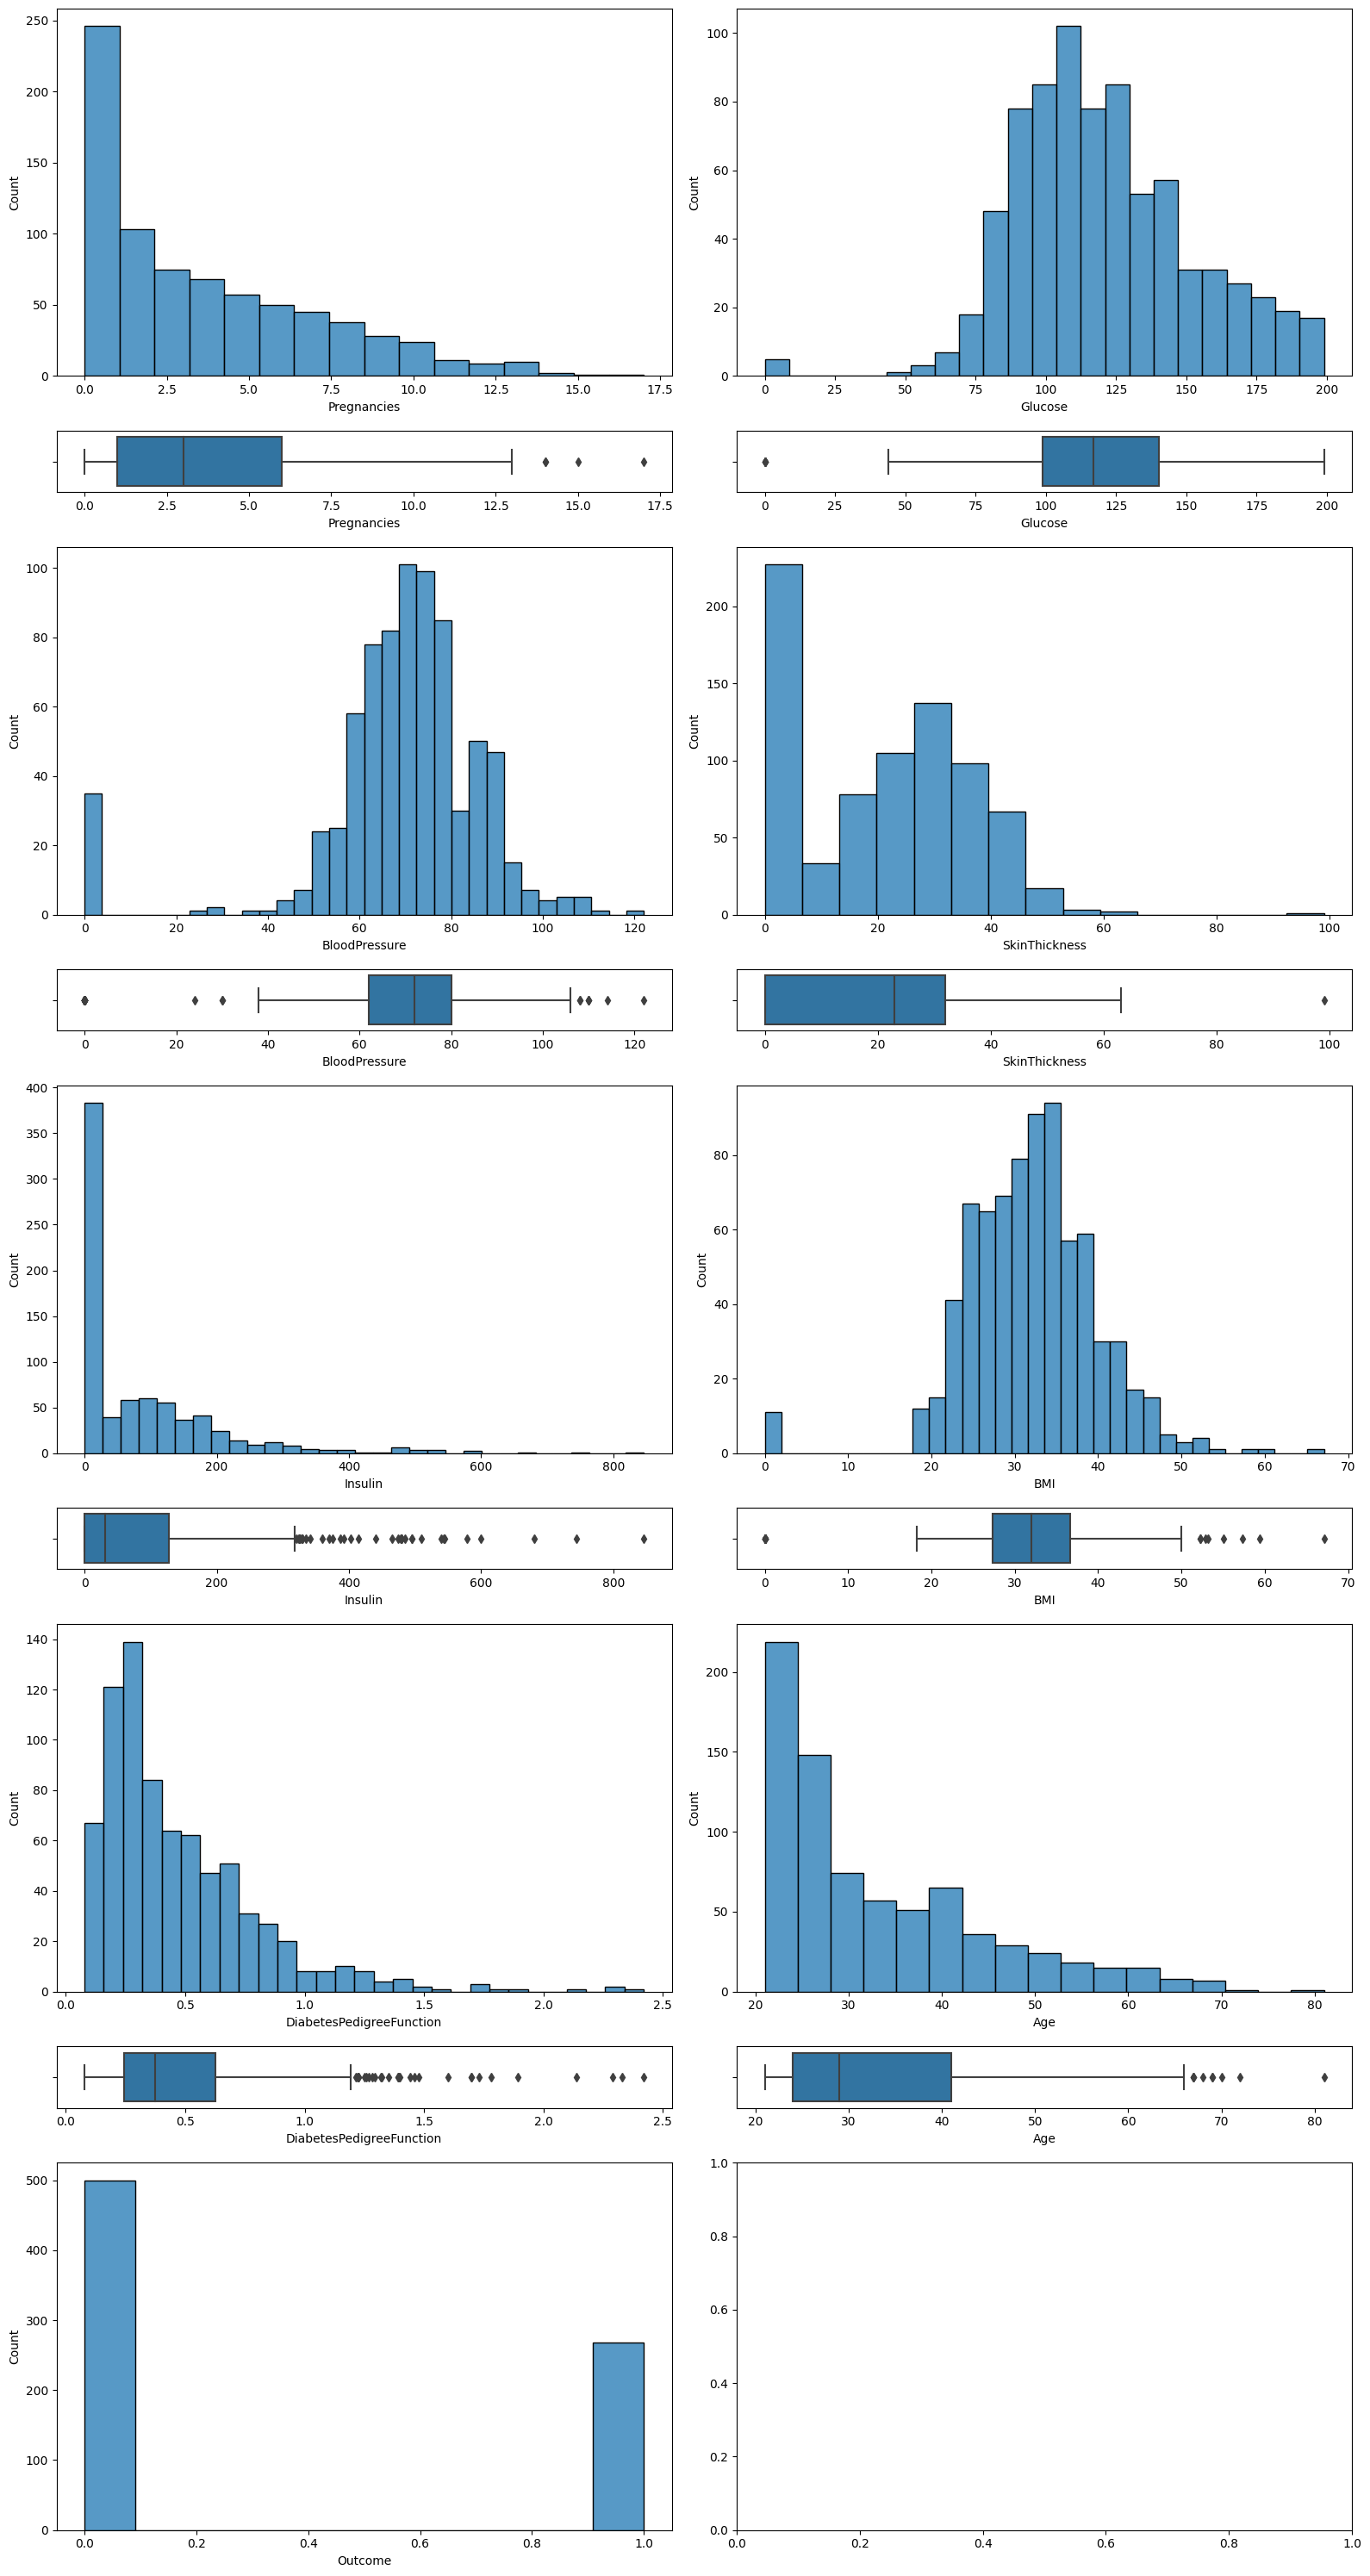

In [8]:
#Análisis sobre variables numéricas

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 9 filas y 2 columnas
fig, axis = plt.subplots(9, 2, figsize=(16, 30), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1, 6]})

# Gráficos de la primera sección
sns.histplot(ax=axis[0, 0], data=dataframe, x="Pregnancies")
sns.boxplot(ax=axis[1, 0], data=dataframe, x="Pregnancies")
sns.histplot(ax=axis[0, 1], data=dataframe, x="Glucose")
sns.boxplot(ax=axis[1, 1], data=dataframe, x="Glucose")

# Gráficos de la segunda sección
sns.histplot(ax=axis[2, 0], data=dataframe, x="BloodPressure")
sns.boxplot(ax=axis[3, 0], data=dataframe, x="BloodPressure")
sns.histplot(ax=axis[2, 1], data=dataframe, x="SkinThickness")
sns.boxplot(ax=axis[3, 1], data=dataframe, x="SkinThickness")

# Gráficos de la tercera sección
sns.histplot(ax=axis[4, 0], data=dataframe, x="Insulin")
sns.boxplot(ax=axis[5, 0], data=dataframe, x="Insulin")
sns.histplot(ax=axis[4, 1], data=dataframe, x="BMI")
sns.boxplot(ax=axis[5, 1], data=dataframe, x="BMI")

# Gráficos de la cuarta sección
sns.histplot(ax=axis[6, 0], data=dataframe, x="DiabetesPedigreeFunction")
sns.boxplot(ax=axis[7, 0], data=dataframe, x="DiabetesPedigreeFunction")
sns.histplot(ax=axis[6, 1], data=dataframe, x="Age")
sns.boxplot(ax=axis[7, 1], data=dataframe, x="Age")

# Gráfico adicional para la variable 'Outcome'
sns.histplot(ax=axis[8, 0], data=dataframe, x="Outcome")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

conclusion:

vemos varios outliers a 0 que debemos eliminar

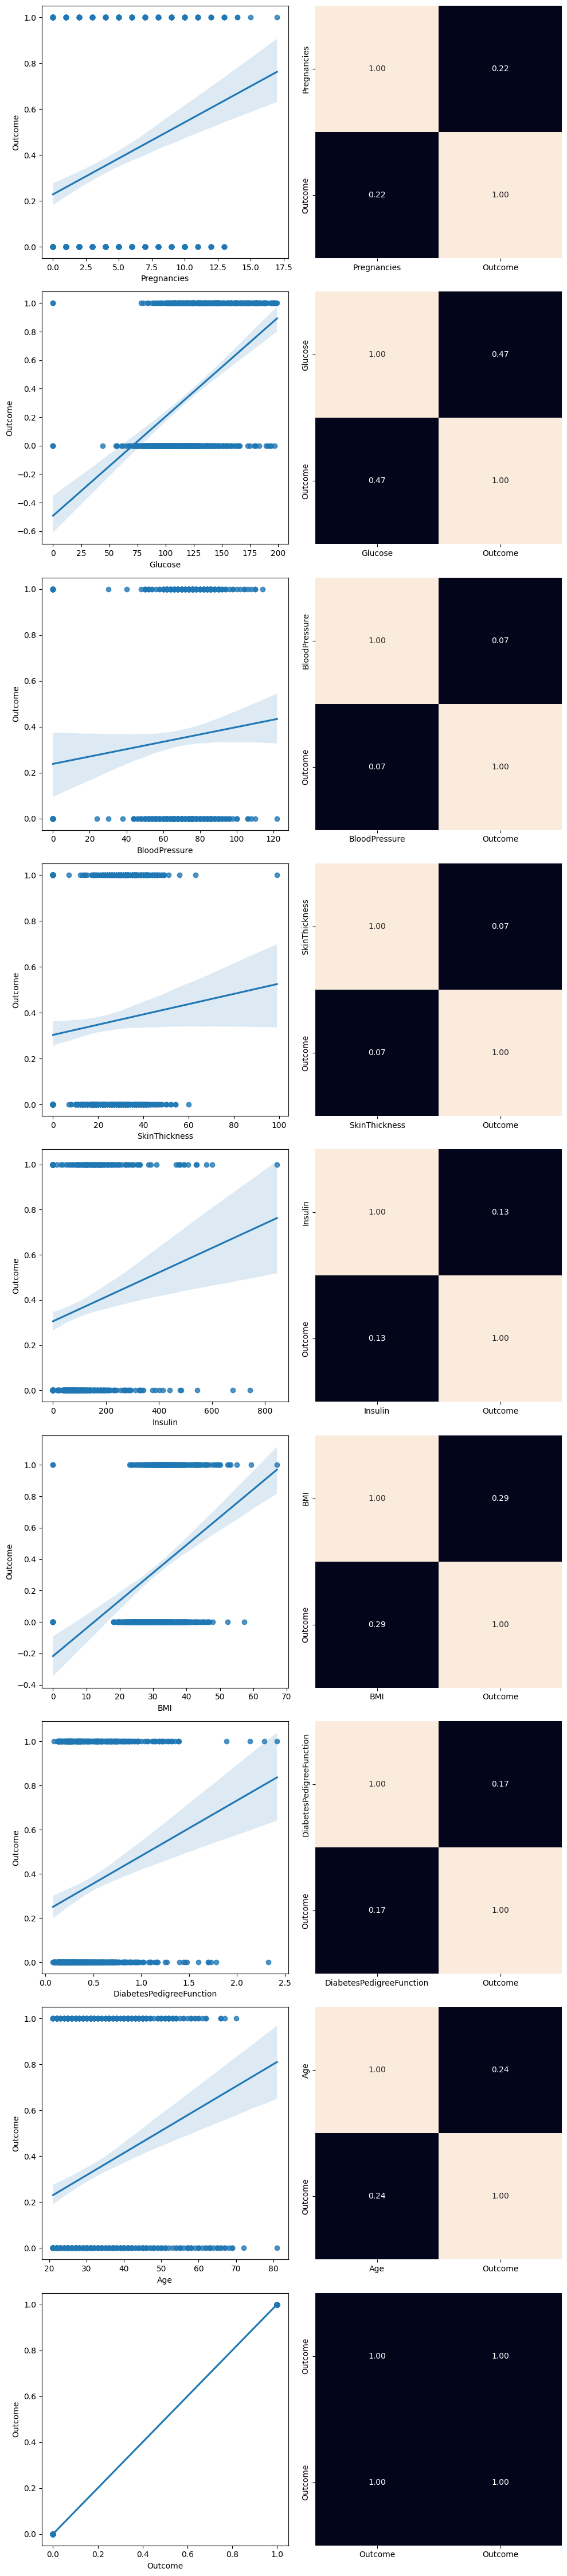

In [16]:
'''#NUMERIC NUMERIC
fig, axis = plt.subplots(8, 2, figsize = (15, 25))


#Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome
# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = dataframe, x = "Pregnancies", y = "Outcome")
sns.heatmap(dataframe[["Outcome", "Pregnancies"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = True) # False = Pone una grafica para ambos / En True pone escala para cada uno


sns.regplot(ax = axis[0, 1], data = dataframe, x = "Glucose", y = "Outcome").set(ylabel=None)
sns.heatmap(dataframe[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = dataframe, x = "BloodPressure", y = "Outcome").set(ylabel=None)
sns.heatmap(dataframe[["Outcome", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = dataframe, x = "SkinThickness", y = "Outcome").set(ylabel=None)
sns.heatmap(dataframe[["Outcome", "SkinThickness"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

sns.regplot(ax = axis[4, 0], data = dataframe, x = "Insulin", y = "Outcome").set(ylabel=None)
sns.heatmap(dataframe[["Outcome", "Insulin"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0])

sns.regplot(ax = axis[4, 1], data = dataframe, x = "BMI", y = "Outcome").set(ylabel=None)
sns.heatmap(dataframe[["Outcome", "BMI"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1])

sns.regplot(ax = axis[6, 0], data = dataframe, x = "DiabetesPedigreeFunction", y = "Outcome").set(ylabel=None)
sns.heatmap(dataframe[["Outcome", "DiabetesPedigreeFunction"]].corr(), annot = True, fmt = ".2f", ax = axis[7, 0])


sns.regplot(ax = axis[6, 1], data = dataframe, x = "Age", y = "Outcome").set(ylabel=None)
sns.heatmap(dataframe[["Outcome", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[7, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()'''


import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas a incluir en el análisis
numeric_variables_diabetes = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                              'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Crear una figura de subplots con configuración de filas y columnas
num_rows_diabetes = len(numeric_variables_diabetes)
fig_diabetes, axis_diabetes = plt.subplots(num_rows_diabetes, 2, figsize=(10, 5*num_rows_diabetes))

# Generar los gráficos de dispersión y las matrices de correlación para las variables numéricas
for i, var in enumerate(numeric_variables_diabetes):
    sns.regplot(ax=axis_diabetes[i, 0], data=dataframe, x=var, y="Outcome")
    sns.heatmap(dataframe[[var, "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis_diabetes[i, 1], cbar=False)
    axis_diabetes[i, 0].set_ylabel("Outcome")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

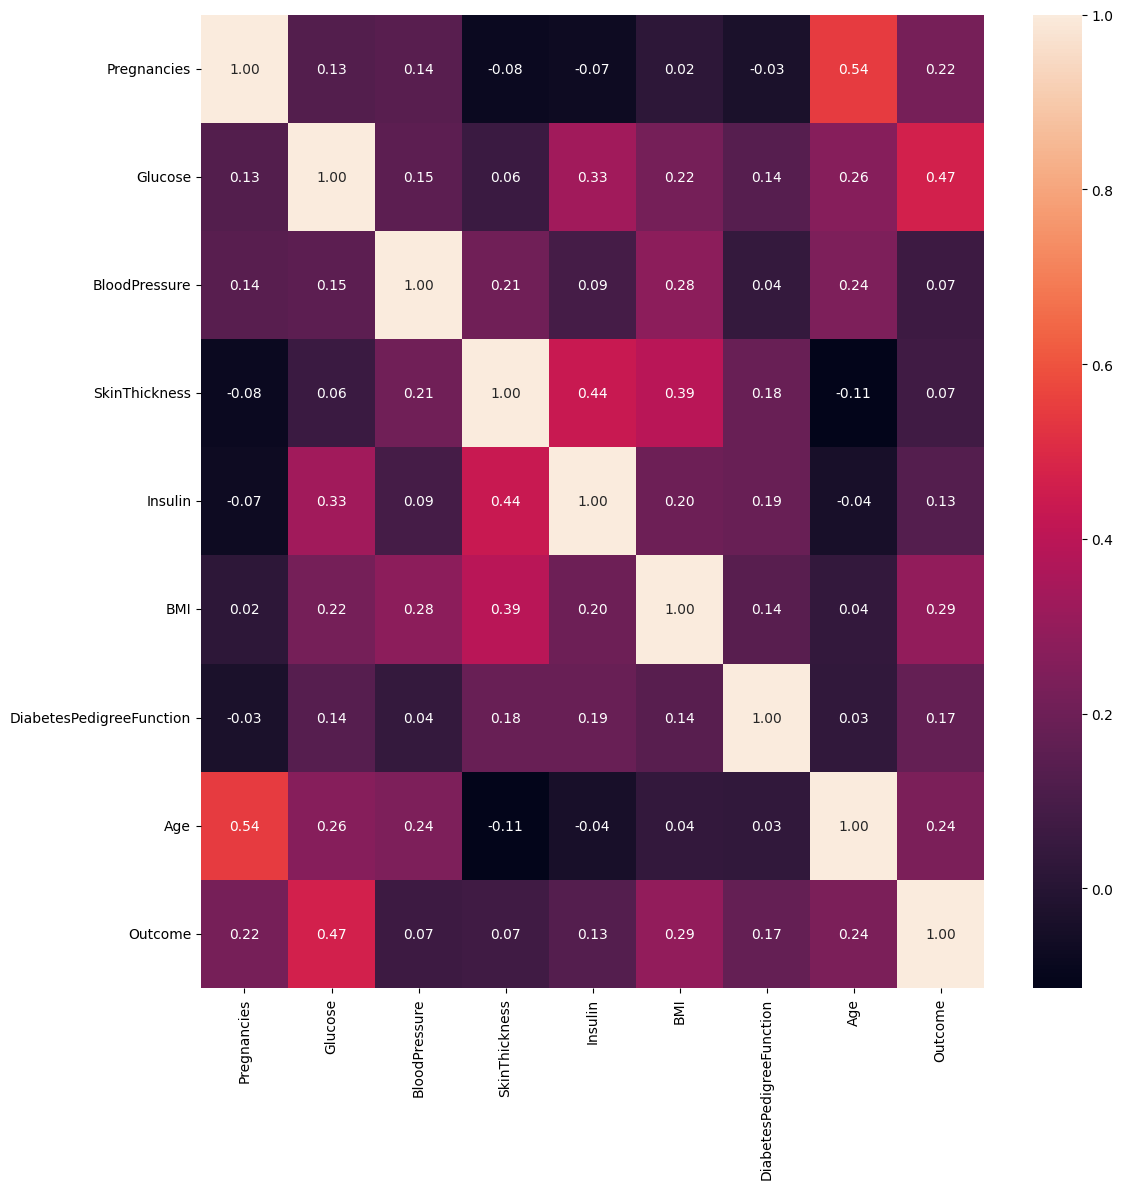

In [18]:
#analisis correlaciones

import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas a incluir en el análisis
numeric_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                              'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Crear una figura de subplots con configuración de 1 fila y 1 columna
fig, axis = plt.subplots(figsize=(12, 12))

# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = dataframe[numeric_variables].corr()

# Generar el heatmap de correlaciones
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", ax=axis)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [ ]:
'''#Analizamos las variables mas altas

fig, axis = plt.subplots(figsize = (10, 5), ncols = 3)

sns.regplot(ax = axis[0], data = dataframe_filtered, x = "Heart disease_number", y = "Total Population")
sns.regplot(ax = axis[1], data = dataframe_filtered, x = "Obesity_number", y = "20-29")
sns.regplot(ax = axis[2], data = dataframe_filtered, x = "Total Hospitals (2019)", y = "Total Specialist Physicians (2019)")

plt.tight_layout()

plt.show()'''

In [ ]:
#dibujar el pairplot

'''sns.pairplot(data = dataframe_filtered)'''

In [19]:
#análisis descriptivo

dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


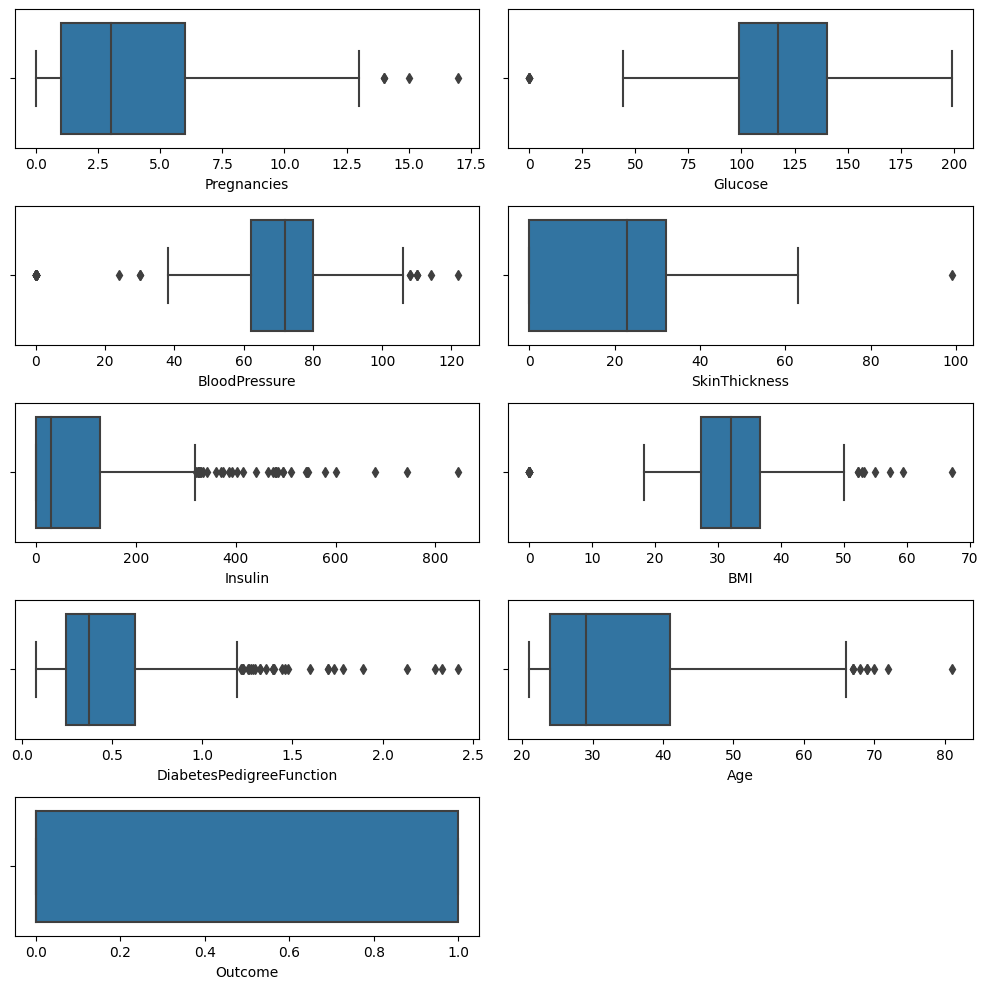

In [26]:
#Buscar outliers

import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas a incluir en el análisis
numeric_variables_diabetes = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                              'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Calcular el número necesario de filas y columnas para organizar los gráficos
num_rows_diabetes = (len(numeric_variables_diabetes) + 1) // 2  # Sumamos 1 para redondear hacia arriba

# Crear una figura de subplots con dos columnas y filas necesarias
fig_diabetes, axis_diabetes = plt.subplots(num_rows_diabetes, 2, figsize=(10, 2*num_rows_diabetes))

# Aplanar el array de ejes para facilitar el acceso a cada gráfico
axis_diabetes = axis_diabetes.flatten()

# Generar los gráficos de caja para identificar outliers en las variables numéricas
for i, var in enumerate(numeric_variables_diabetes):
    sns.boxplot(ax=axis_diabetes[i], data=dataframe, x=var)

# Si hay un número impar de variables, eliminar el último eje vacío
if len(numeric_variables_diabetes) % 2 != 0:
    fig_diabetes.delaxes(axis_diabetes[-1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [41]:
# Analizar outliers para cada variable seleccionada
numeric_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                              'DiabetesPedigreeFunction', 'Age', 'Outcome']

for variable in numeric_variables:
    variable_stats = dataframe[variable].describe()
    print(variable_stats)

    variable_iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * variable_iqr
    lower_limit = variable_stats["25%"] - 1.5 * variable_iqr

    print(f"- Los límites superior e inferior para la búsqueda de outliers en {variable} son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(variable_iqr, 2)}\n")


count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en Pregnancies son 13.5 y -6.5, con un rango intercuartílico de 5.0

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en Glucose son 202.12 y 37.12, con un rango intercuartílico de 41.25

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en BloodPressure son 107.0 y 35.0, con un rango intercuartílico de 18.0

count    768.000000

In [42]:
#eliminar outtliers

'''dataframe = dataframe[dataframe['insulin']]'''

"dataframe = dataframe[dataframe['insulin']]"

In [43]:
#Análisis de valores faltantes

dataframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [44]:
#escalado de valores (feature scaling)


#Normalización

from sklearn.preprocessing import StandardScaler

# Variables numéricas seleccionadas
numeric_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                              'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Crear un DataFrame con las variables numéricas seleccionadas
dataframe_selected = dataframe[numeric_variables]

# Normalizar las variables numéricas
scaler = StandardScaler()
norm_features = scaler.fit_transform(dataframe_selected)

# Crear un DataFrame con las variables normalizadas
dataframe_norm = pd.DataFrame(norm_features, index=dataframe_selected.index, columns=numeric_variables)
dataframe_norm.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760,-0.732120
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111,1.365896
7,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847,-0.732120
8,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259,1.365896
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346,1.365896


In [45]:
#escalado minimo-maximo

from sklearn.preprocessing import MinMaxScaler

#Variables numéricas seleccionadas
numeric_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                              'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Crear un DataFrame con las variables numéricas seleccionadas
dataframe_selected = dataframe[numeric_variables]

# Escalar las variables numéricas utilizando MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dataframe_selected)

# Crear un DataFrame con las variables escaladas
dataframe_scal = pd.DataFrame(scaled_features, index=dataframe_selected.index, columns=numeric_variables)
dataframe_scal.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0.0
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333,1.0
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333,0.0
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,0.533333,1.0
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,0.550000,1.0


In [68]:
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Supongamos que tienes un dataframe llamado "dataframe_scal" que contiene las características y la variable objetivo.

# Transformar la variable objetivo y a binario
y = dataframe_scal["Outcome"]
y_bin = (y > 0.5).astype(int)

# Dividimos el conjunto de datos en entrenamiento (train) y pruebas (test)
X = dataframe_scal.drop("Outcome", axis=1)

# Aquí puedes utilizar "y" o "y_bin", dependiendo de si deseas la variable original o la binaria para el entrenamiento.
# Si utilizas "y", asegúrate de que "y" sea categórica o discreta (no valores continuos).
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Con un valor de k = 5, queremos decir implícitamente que queremos mantener las 5 mejores características en el conjunto de datos
selection_model = SelectKBest(chi2, k=5)
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

X_train_sel.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,0.117647,0.422111,0.000000,0.096499,0.000000
1,0.529412,0.562814,0.420268,0.514091,0.483333
2,0.058824,0.698492,0.427720,0.245944,0.016667
3,0.000000,0.809045,0.326379,0.075149,0.733333
4,0.352941,0.673367,0.688525,0.068318,0.416667


In [69]:
X_test_sel.head()


,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.492462,0.506706,0.150299,0.366667
1,0.117647,0.562814,0.532042,0.029889,0.000000
2,0.117647,0.542714,0.459016,0.034159,0.000000
3,0.470588,0.537688,0.366617,0.332195,0.216667
4,0.411765,0.683417,0.445604,0.056362,0.483333


In [70]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\017-PROYECTO1-decission-trees-diabetes-main\src\train_outcome.csv", index=False)
X_test_sel.to_csv(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\017-PROYECTO1-decission-trees-diabetes-main\src\test_outcome.csv", index=False)



## Paso 3: Construye un modelo de árbol de decisión

In [61]:
# Paso 1. Lectura del conjunto de datos procesado

from sklearn.model_selection import train_test_split

# Cargar los datos desde la ruta del dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
data = pd.read_csv(url)

# Dividir los datos en características (X) y etiquetas (y)
X = data.drop(columns=['Outcome'])
y = data['Outcome']



In [62]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:

# Crear el modelo de Árbol de Decisión

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)



In [57]:
# Entrenar el modelo con el conjunto de entrenamiento
clf.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [58]:
from sklearn.metrics import accuracy_score

# Predecir las etiquetas para el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.7467532467532467


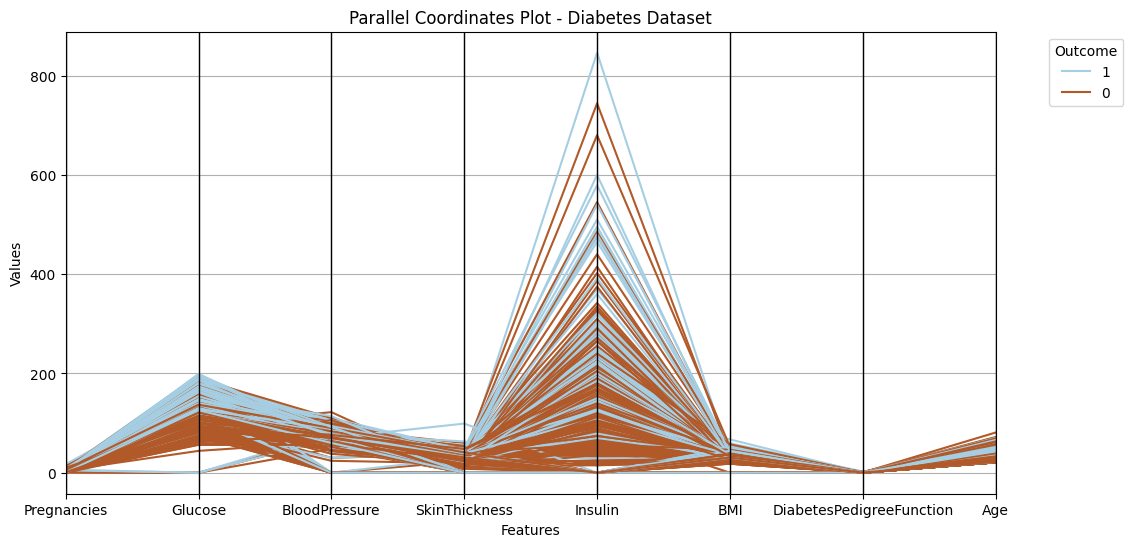

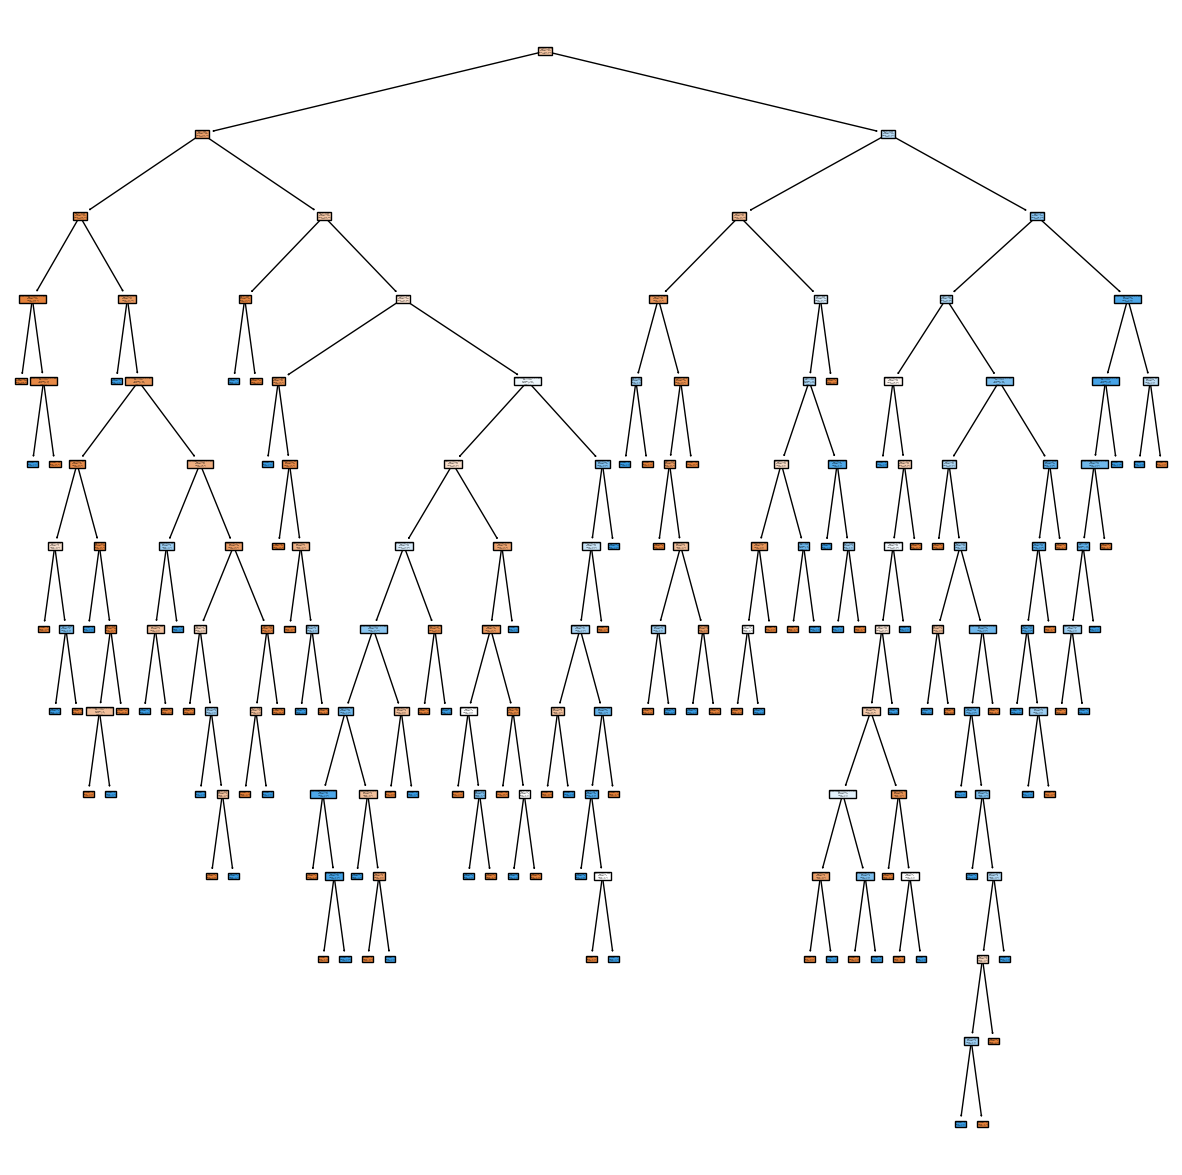

Precisión del modelo: 0.7467532467532467


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn import tree


# Cargar los datos desde la ruta del dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
data = pd.read_csv(url)

# Dividir los datos en características (X) y etiquetas (y)
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Añadir el gráfico parallel_coordinates para visualizar las características
data['Outcome'] = y
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(data, 'Outcome', colormap='Paired')
plt.title("Parallel Coordinates Plot - Diabetes Dataset")
plt.xlabel("Features")
plt.ylabel("Values")
plt.legend(title="Outcome", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Árbol de Decisión
clf = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
clf.fit(X_train, y_train)

# Visualizar el árbol de decisión
plt.figure(figsize=(15, 15))
tree.plot_tree(clf,
               feature_names=list(X_train.columns),
               class_names=["0", "1"],
               filled=True)
plt.show()

# Predecir las etiquetas para el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)
